### 7.4

Equation 7.6 gives the probability per unit energy for finding an electron in a given energy state $E$ at a given temperature $T$:
$$
P(T, E) = \frac{1}{1 + \exp{\{\left( E - E_{\rm F}\right) /kT}\}},
$$
where $E_{\rm F}$ is the Fermi energy and $k$ is the Stefan-Boltzmann constant and equals $8.62\times10^{-5}\,{\rm eV\ K^{-1}}$.

The bandgap energy for silicon is the difference in energy between the top of the valence band and the bottom of the conduction band $E_{\rm G} = E - E_{\rm F} = 1.12\,{\rm eV}$ (Table 7.4).

By taking the ratio of $P$ at the two temperatures, we can estimate the relative probabilities:
$$
P(E = E_{\rm G})/P(E = E_{\rm F}) = \frac{\frac{1}{1 + \exp{\{\left( E - E_{\rm F}\right) /kT}\}}}{1/2}.
$$

Let's make a plot to compare the prediction from Fermi-Dirac statistics (Equation 7.6) to that of Boltzmann (Equation 7.3).

/var/folders/0p/vptds8v9203dlqkw0pv01n100000gr/T/ipykernel_50529/2356649113.py:10: RuntimeWarning: overflow encountered in exp
  return 2./(1. + np.exp(E/StefanBoltzmann_const/T))


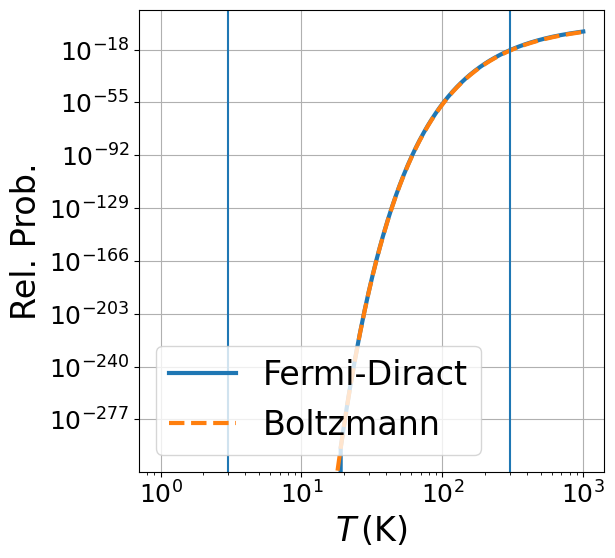

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

StefanBoltzmann_const = 8.62e-5 # eV/K

def FermiDirac_probability(T, E=1.12):
    
    return 2./(1. + np.exp(E/StefanBoltzmann_const/T))

def Boltzmann_probability(T, E=1.12, gi=1, gj=1):
    return gi/gj*np.exp(-E/StefanBoltzmann_const/T)

temperatures = np.linspace(1., 1000., 1000)
FD_prob = FermiDirac_probability(temperatures)
B_prob = Boltzmann_probability(temperatures)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.loglog(temperatures, FD_prob, lw=3, label="Fermi-Diract")
ax.loglog(temperatures, B_prob, lw=3, ls='--', label="Boltzmann")

ax.grid(True)
ax.legend(loc='best', fontsize=24)
ax.tick_params(labelsize=18)
ax.set_xlabel(r'$T\,\left( {\rm K} \right)$', fontsize=24)
ax.set_ylabel("Rel. Prob.", fontsize=24)
ax.axvline(3.)
ax.axvline(300.)

You can see that, even for $T \rightarrow 1000\,{\rm K}$, there is a very small probability to occupy the conduction band.

### 7.5

We're told to assume the electrical conductivity depends on the number density of electrons, which we can estimate as a function of bandgap energy $E_{\rm G}$ and temperature $T$ using Equation 7.9:
$$
n_N = A T^{3/2} e^{-\frac{E_{\rm G}}{kT}}.
$$

For silicon, $E_{\rm G} = 1.12\,{\rm eV}$ and for germanium, $E_{\rm G} = 0.67\,{\rm eV}$ (Table 7.4).

So we're asked to compare $n_N$ for $T = 40\,{\rm K}$ and for $T = 40\,{\rm K} + 1\,{\rm K}$ for these two semiconductors. This is a very small difference $\Delta T/T = 1/40$, so let's Taylor-expand $n_N$ about small $\Delta T$:

$$
(T + \Delta T)^{3/2} = T^{3/2} \left( 1 + \frac{\Delta T}{T} \right)^{3/2} \approx T^{3/2} \left( 1 + \frac{3\Delta T}{2T} \right)
$$

$$
\exp\left(-\frac{E}{k\left( T + \Delta T\right)}\right) = \exp\left(-\frac{E}{kT} \left( 1 + \frac{\Delta T}{T}\right)^{-1} \right) \approx \exp\left(-\frac{E}{kT} \left( 1 - \frac{\Delta T}{T}\right) \right) = \exp\left(-\frac{E}{kT}\right)\ \exp\left( \frac{E}{kT} \frac{\Delta T}{T} \right)
$$

$$
\Rightarrow T^{3/2} e^{-\frac{E}{kT}} \left( 1 + \left( \frac{3\Delta T}{2T} \right) \right) \exp\left( \frac{E}{kT} \frac{\Delta T}{T} \right).
$$

The term on the left outside the parentheses is just number density of electrons at temperature $T$, so taking the ratio gives
$$
\frac{n_N(T+\Delta T)}{n_N(T)} \approx \left( 1 + \left( \frac{3\Delta T}{2T} \right) \right) \exp\left( \frac{E}{kT} \frac{\Delta T}{T} \right).
$$

Again, we can plot this expression.

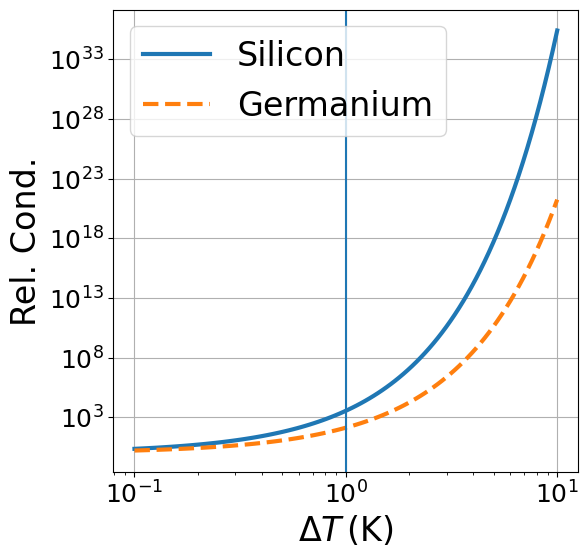

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

StefanBoltzmann_const = 8.62e-5 # eV/K

def relative_conductivity(Delta_T, E, T=40.):
    
    return (1. + 3*Delta_T/2/T)*np.exp(E/StefanBoltzmann_const/T*Delta_T/T)

Delta_T = 10**np.linspace(-1, 1, 100)
E_Si = 1.12
E_Ge = 0.67
Si_prob = relative_conductivity(Delta_T, E_Si)
Ge_prob = relative_conductivity(Delta_T, E_Ge)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

ax.loglog(Delta_T, Si_prob, lw=3, label="Silicon")
ax.loglog(Delta_T, Ge_prob, lw=3, ls='--', label="Germanium")

ax.grid(True)
ax.legend(loc='best', fontsize=24)
ax.tick_params(labelsize=18)
ax.set_xlabel(r'$\Delta T\,\left( {\rm K} \right)$', fontsize=24)
ax.set_ylabel("Rel. Cond.", fontsize=24)
ax.axvline(1.)

### 7.6

The quantum efficiency $q$ is a measure of how readily photons are converted into current by the CCD, and it depends on the surface reflectivity $R$, the absorption coefficient $\alpha$, and the layer thickness $z$. 

Equation 7.11 tells us how $R$ depends on the index of refraction:
$$
R = \left( \frac{n_1 - n_2}{n_1 + n_2} \right)^2,
$$
where $n_1$ is the index for air ($\approx 1$) and $n_2$ is the index for silicon (we're told $n_2 = 4$ at $500\,{\rm nm}$).

With these numbers, we get
$$
R = \left( \frac{1 - 4.4}{1 + 4.4} \right)^2 = 0.40,
$$
which means 40\% of the incident energy is reflected, leaving 60\% to be absorbed the CCD.

Next, we need to determine the absorption coefficient for silicon at 500 nm. Figure 7.10 gives that information. The figure suggests $\alpha = 10^4\,{\rm cm^{-1}}$. (Unfortunately, Chromey has a typo in the figure caption. You can see a similar plot with the right units here - https://www.pveducation.org/pvcdrom/materials/optical-properties-of-silicon.)

So we can estimate the required thickness $z$ to achieve a given quantum efficiency $q$ using 
$$
q = \left( 1 - R \right) e^{-\alpha z} \Rightarrow z = \frac{\ln \left( \frac{1 - R}{q} \right)}{\alpha} = \frac{\ln \left( \frac{0.6}{0.4} \right)}{\left( 10^4\,{\rm cm^{-1}}\right)} \approx \boxed{ 405\,{\rm nm} }.
$$

### 8.1

We're told we start out with a quantum efficiency of 40\% for our detector.

Referring to Problem 7.6 above, we can cast the quantum efficiency as
$$
q = \left( 1 - R \right) e^{-\alpha z}.
$$

We are told that the reflectivity of the detector is reduced from 30\% to 5\%. Since nothing else about the detector has changed, we can calculate the ratio of the new to the old efficieny as 
$$
\frac{q^\prime}{q} = \frac{1-R^\prime}{1-R},
$$
where the primed quantities represent the new values.

Solving for $q^\prime$ gives
$$
q^\prime = q \left( \frac{1 - R^\prime}{1 - R} \right) = \left( 0.4 \right) \left( \frac{1 - 0.05}{1 - 0.3} \right) = \boxed{ 0.54 }.
$$

### 8.2

Equation 8.5 tells us
$$
{\rm DQE} = \frac{\left( \rm SNR_{out} \right)^2}{\left( \rm SNR_{perfect} \right)^2} = \frac{\left( \rm SNR_{out} \right)^2}{N_{\rm in}}.
$$

We are told that the measurement involves $10^4$ photons, which will take as $N_{\rm in}$. So next we'll need the signal-to-noise ratio for the voltages, ${\rm SNR_{out}}$.

Our average voltage (the signal) is
$$
S = \frac{\left( 113 + 120 + 115 \right)\,{\rm mV}}{3} = 116\,{\rm mV}.
$$

And the noise will be the standard deviation of the voltage measurements:
$$
\sigma = 3\,{\rm mV}.
$$

So now we can write our DQE as
$$
{\rm DQE} = \frac{\left( \frac{116\,{\rm mV}}{3\,{\rm mV}} \right)^2}{10^4} \approx \boxed{ 0.15 }.
$$

### 8.3

The detector in this problem has a quantum efficiency of $q$. That means that, for every $N_{\rm in}$ photon that strikes the surface of the detector, $N_{\rm detect} = q N_{\rm in}$ are actually detected (and $\left( 1 - q \right) N_{\rm in}$ are NOT detected).

The detector is also said to have a quantum yield of $y$ with an associated uncertainty $\sigma(y)$. That means that each of the $N_{\rm detect} = q N_{\rm in}$ induces $N_{\rm events} = y N_{\rm detect}$ events that are counted up by the detector.

So, as described by Equation 2.31 back in Chapter 2, the uncertainty $\sigma(N_{\rm events})$ associated with the events is given by
$$
\sigma^2(N_{\rm events}) = \left( \frac{\partial N_{\rm events}}{\partial N_{\rm detect}} \right)^2 \sigma^2\left(N_{\rm detect}\right) + \left( \frac{\partial N_{\rm events}}{\partial y} \right)^2 \sigma^2\left(y\right) = y^2N_{\rm detect} + N_{\rm detect}^2 \sigma^2(y),
$$
taking Poisson error bars for $N_{\rm detect}$ (i.e., $\sigma^2\left(N_{\rm detect}\right) = N_{\rm detect}$).

To calculate DQE, we need $\left( SNR\right)_{\rm out}^2$ and $\left( SNR\right)_{\rm perfect}^2$. The latter is easy:
$$
\left( SNR\right)_{\rm perfect}^2 = N_{\rm in}.
$$

The former is
$$
\left( SNR\right)_{\rm out}^2 = \frac{y^2 N_{\rm detect}^2}{y^2 N_{\rm detect} + N_{\rm detect}^2 \sigma^2(y)} = \frac{N_{\rm detect}^2}{N_{\rm detect} + N_{\rm detect}^2 \left( \frac{\sigma(y)}{y} \right)^2}
$$

Now to calculate DQE:
$$
{\rm DQE} = \frac{\frac{N_{\rm detect}^2}{N_{\rm detect} + N_{\rm detect}^2 \left( \frac{\sigma(y)}{y} \right)^2}}{N_{\rm in}}
$$

But remember $N_{\rm detect} = q N_{\rm in}$, so
$$
{\rm DQE} = \frac{\frac{q^2 N_{\rm in}^2}{q N_{\rm in} + q^2 N_{\rm in}^2 \left(\frac{\sigma(y)}{y}\right)^2}}{N_{\rm in}} = \frac{q^2 N_{\rm in}}{q N_{\rm in} + q^2 N_{\rm in}^2 \left(\frac{\sigma(y)}{y}\right)^2} = \boxed{ \frac{q }{1 + q N_{\rm in} \left(\frac{\sigma(y)}{y}\right)^2} }
$$

So you can see that, if $\sigma(y) = 0$, then ${\rm DQE} = q$. However, since all numbers are positive, if $\sigma(y) > 0$, then ${\rm DQE} < q$.

### 8.4

We'll need to recall the definition of QE (Equation 8.1):
$$
{\rm QE} = \frac{N_{\rm detect}}{N_{\rm in}}.
$$

We're told that ${\rm QE} = 0.9$, so if 1000 photons are incident in the 1-second exposure, we'll actually detect $(0.9)\times1000 = 900$ of them.

Then recall the definition of DQE (Equation 8.5):
$$
{\rm DQE} = \frac{\left( \rm SNR \right)^2_{\rm out}}{\left( \rm SNR \right)^2_{\rm perfect}}.
$$

For our detector we have a signal $S = 900$ photons and sources of noise including the dark current $\left(1\ {\rm photon\, s^{-1}}\right)\times\left(1\,{\rm s}\right) = 1\ {\rm photon}$ and a read noise of 3 photons.

Therefore, our out SNR is
$$
\left( {\rm SNR} \right)_{\rm out} = \frac{900}{\sqrt{\left( 900 + 1 + 3 \right) + 1 + 3 }} \approx 30.
$$

A perfect detector would have
$$
\left({\rm SNR}\right)_{\rm perfect} = \sqrt{1000} \approx 32.
$$

So
$$
{\rm DQE} = \frac{30^2}{32^2} = \boxed{ 0.89 }.
$$

For the 4-second exposure, we have all the same numbers except now the dark current is $\left(1\ {\rm photon\, s^{-1}}\right)\times\left(400\,{\rm s}\right) = 400\ {\rm photon}$.

So
$$
\left( {\rm SNR} \right)_{\rm out} = \frac{900}{\sqrt{\left( 900 + 400 + 3 \right) + 400 + 3}} \approx 22.
$$

And
$$
{\rm DQE} = \frac{22^2}{32^2} = \boxed{ 0.47 }.
$$